# COVID-19 plots
The purpose of this notebook is to plot the progression of COVID-19 cases based upon the New York Times' daily updated database. See https://github.com/nytimes/covid-19-data for more details on that database. Note data are stored by state and by county. Plots are linear-log, in order to capture the exponential growth of COVID-19, and perhaps more easily visualize when this growth is no longer exponential. 

Kirk Knobelspiesse, knobelspiesse@gmail.com

## Setup

In [1]:
import numpy as np
import pandas as pd
print('Using pandas version ',pd.__version__)
%matplotlib inline

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt
import datetime

Using pandas version  0.25.3


## Get data

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
filename_states = "us-states.csv"
filename_counties="us-counties.csv"
stt = pd.read_csv(url+filename_states, skiprows=2, names=["date","state","fips","cases","deaths"], index_col=0)
cyt = pd.read_csv(url+filename_counties, skiprows=2, names=["date","county","state","fips","cases","deaths"], index_col=0)

In [3]:
cyt

,county,state,fips,cases,deaths
date,,,,,
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0
2020-01-25,Orange,California,6059.0,1,0
...,...,...,...,...,...
2020-03-31,Sheridan,Wyoming,56033.0,10,0
2020-03-31,Sublette,Wyoming,56035.0,1,0
2020-03-31,Sweetwater,Wyoming,56037.0,2,0


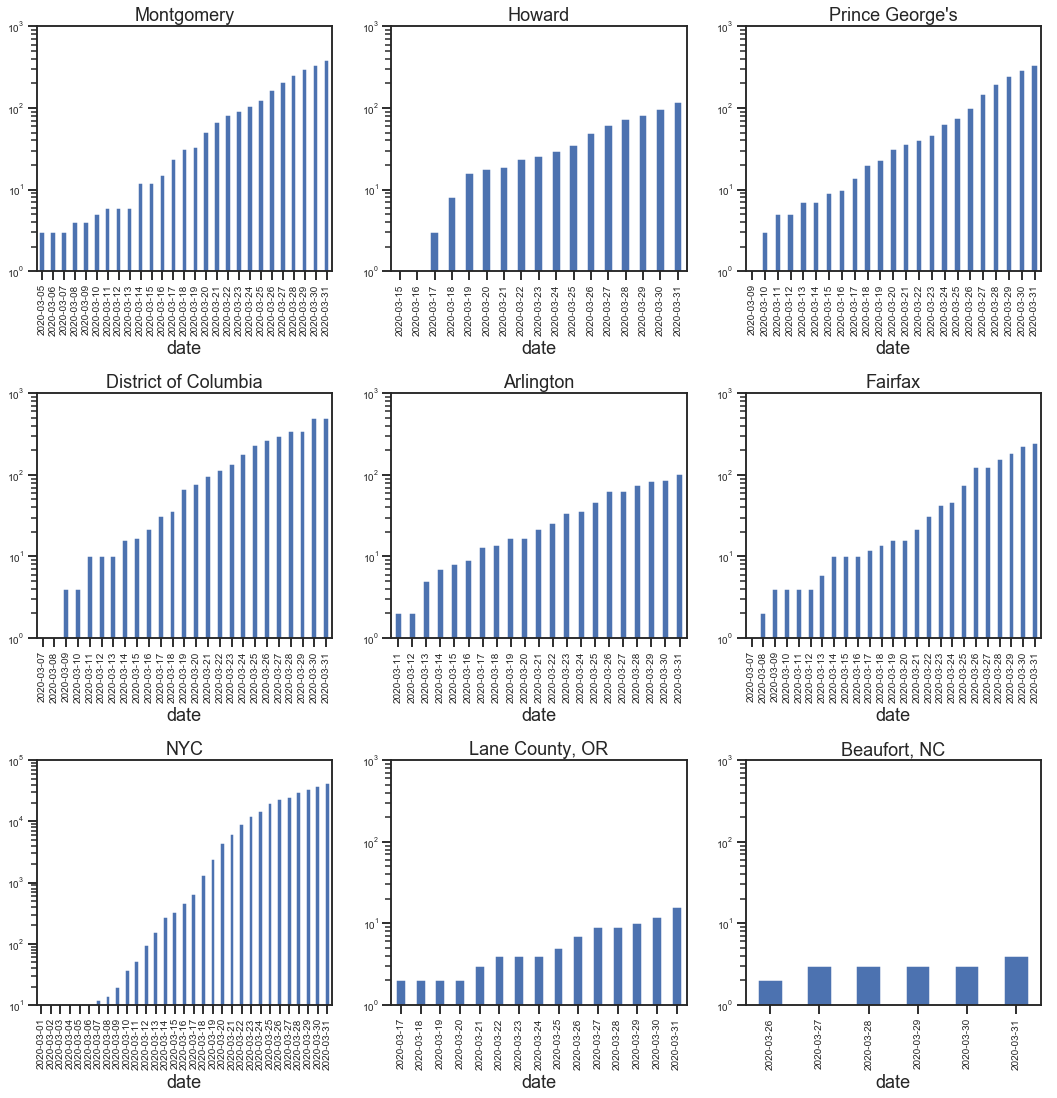

In [4]:

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(18,18))
yr=[1,1000]
fs=10

cyt[ (cyt.state=="Maryland") & (cyt.county=="Montgomery")].cases.plot( ylim=yr, fontsize=fs,\
                                ax=axes[0,0],kind='bar',logy=True,title="Montgomery");
cyt[ (cyt.state=="Maryland") & (cyt.county=="Howard")].cases.plot( ylim=yr, fontsize=fs, \
                                ax=axes[0,1],kind='bar',logy=True,title="Howard");
cyt[ (cyt.state=="Maryland") & (cyt.county=="Prince George's")].cases.plot( ylim=yr, fontsize=fs, \
                                ax=axes[0,2],kind='bar',logy=True,title="Prince George's");
cyt[ (cyt.state=="District of Columbia") & (cyt.county=="District of Columbia")].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,0],kind='bar',logy=True,title="District of Columbia");
cyt[ (cyt.state=="Virginia") & (cyt.county=="Arlington")].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,1],kind='bar',logy=True,title="Arlington");
cyt[ (cyt.state=="Virginia") & (cyt.county=="Fairfax")].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,2],kind='bar',logy=True,title="Fairfax");
cyt[ (cyt.state=="New York") & (cyt.county=="New York City")].cases.plot(ylim=[10,100000], fontsize=fs, \
                                ax=axes[2,0],kind='bar',logy=True,title="NYC");
cyt[ (cyt.state=="Oregon") & (cyt.county=="Lane")].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[2,1],kind='bar',logy=True,title="Lane County, OR");
cyt[ (cyt.state=="North Carolina") & (cyt.county=="Beaufort")].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[2,2],kind='bar',logy=True,title="Beaufort, NC");

plt.subplots_adjust(hspace=0.5)


    
#ax=cyt.cases[ (cyt.state=="Maryland") & (cyt.county=="Montgomery")].plot(kind='bar',figsize=(12,6));
#cyt.cases[(cyt.state=="Maryland") & (cyt.county=="Howard")].plot(kind='bar',ax=ax);


#cyt.cases[(cyt.state=="Maryland") & (cyt.county=="Howard")]

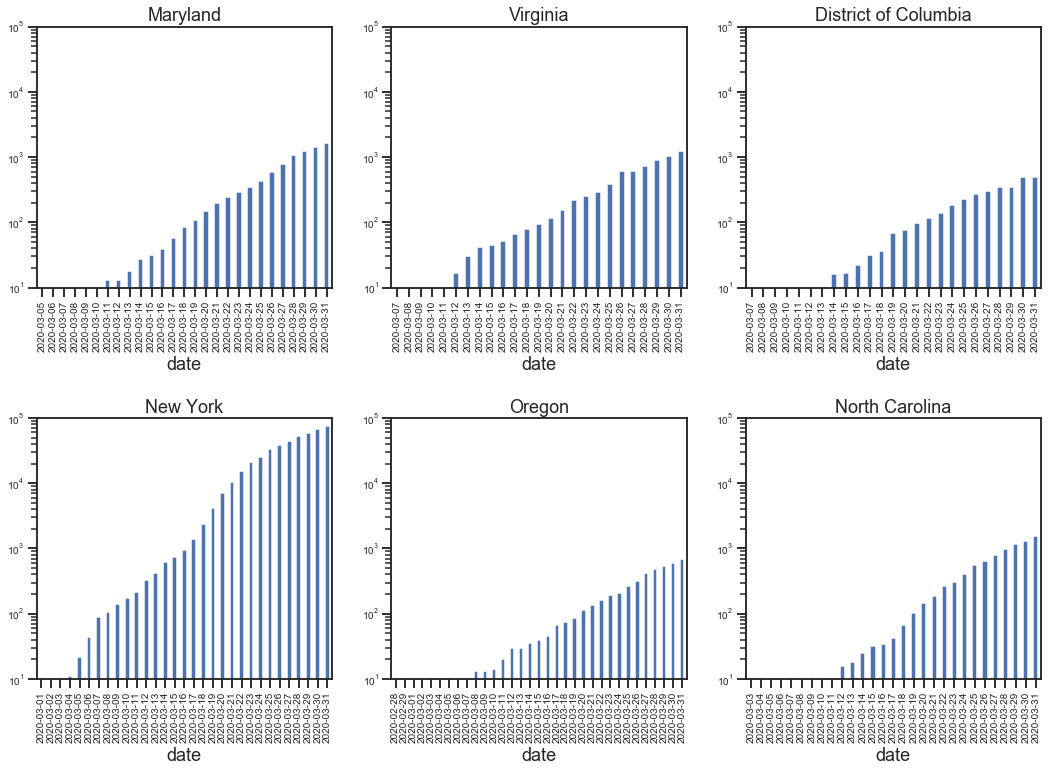

In [6]:

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(18,12))
yr=[10,100000]
fs=10

stt[stt.state=="Maryland"].cases.plot( ylim=yr, fontsize=fs,\
                                ax=axes[0,0],kind='bar',logy=True,title="Maryland");
stt[stt.state=="Virginia"].cases.plot( ylim=yr, fontsize=fs, \
                                ax=axes[0,1],kind='bar',logy=True,title="Virginia");
stt[stt.state=="District of Columbia"].cases.plot( ylim=yr, fontsize=fs, \
                                ax=axes[0,2],kind='bar',logy=True,title="District of Columbia");
stt[stt.state=="New York"].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,0],kind='bar',logy=True,title="New York");
stt[stt.state=="Oregon"].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,1],kind='bar',logy=True,title="Oregon");
stt[stt.state=="North Carolina"].cases.plot(ylim=yr, fontsize=fs, \
                                ax=axes[1,2],kind='bar',logy=True,title="North Carolina");
plt.subplots_adjust(hspace=0.5)

